In [65]:
import pandas as pd
import geopandas as gpd
import folium
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [66]:
url = "https://raw.githubusercontent.com/kaiyungtan/challenge-data-analysis/master/data/clean/belgium_real_estate.csv"
df = pd.read_csv(url, index_col=0)
df

,postal_code,city_name,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,lattitude,longitude,province,region
0,1050,Ixelles,0,340000,6,203,1,0,1,0,95,2,0,to be done up,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
1,1050,Ixelles,0,520000,4,200,0,0,0,0,69,2,0,to renovate,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
2,1050,Ixelles,0,599000,4,160,1,0,1,1,100,2,0,to be done up,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
3,1050,Ixelles,0,599000,3,160,1,0,1,1,130,2,0,good,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
4,1050,Ixelles,0,575000,3,171,0,0,0,0,46,2,0,just renovated,4.381571,50.822285,Bruxelles-Capitale,Bruxelles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40390,1472,Vieux-Genappe,0,475000,5,216,1,1,0,0,1550,4,1,as new,4.401503,50.629025,Brabant wallon,Wallonie
40391,1472,Vieux-Genappe,0,475000,5,215,1,0,1,0,1550,0,1,good,4.401503,50.629025,Brabant wallon,Wallonie
40392,1461,Haut-Ittre,0,499000,5,275,1,0,1,1,1561,4,0,unknown,4.296472,50.648804,Brabant wallon,Wallonie
40393,1761,Borchtlombeek,0,495000,4,235,1,0,0,1,488,4,0,unknown,4.136915,50.848178,Brabant flamand,Flandre


In [67]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [68]:
# Dataframe infos

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40395 entries, 0 to 40394
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postal_code             40395 non-null  int64  
 1   city_name               40395 non-null  object 
 2   type_of_property        40395 non-null  int64  
 3   price                   40395 non-null  int64  
 4   number_of_rooms         40395 non-null  int64  
 5   house_area              40395 non-null  int64  
 6   fully_equipped_kitchen  40395 non-null  int64  
 7   open_fire               40395 non-null  int64  
 8   terrace                 40395 non-null  int64  
 9   garden                  40395 non-null  int64  
 10  surface_of_the_land     40395 non-null  int64  
 11  number_of_facades       40395 non-null  int64  
 12  swimming_pool           40395 non-null  int64  
 13  state_of_the_building   40395 non-null  object 
 14  lattitude               40395 non-null  flo

In [69]:
# Dataframe nan check

df.isna().sum()

postal_code               0
city_name                 0
type_of_property          0
price                     0
number_of_rooms           0
house_area                0
fully_equipped_kitchen    0
open_fire                 0
terrace                   0
garden                    0
surface_of_the_land       0
number_of_facades         0
swimming_pool             0
state_of_the_building     0
lattitude                 0
longitude                 0
province                  0
region                    0
dtype: int64

Mean: 314115 - Median: 275000 - Mode: 249000


C:\Users\zahid\AppData\Local\Temp\ipykernel_10124\1782569190.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('price.svg', dpi=300)


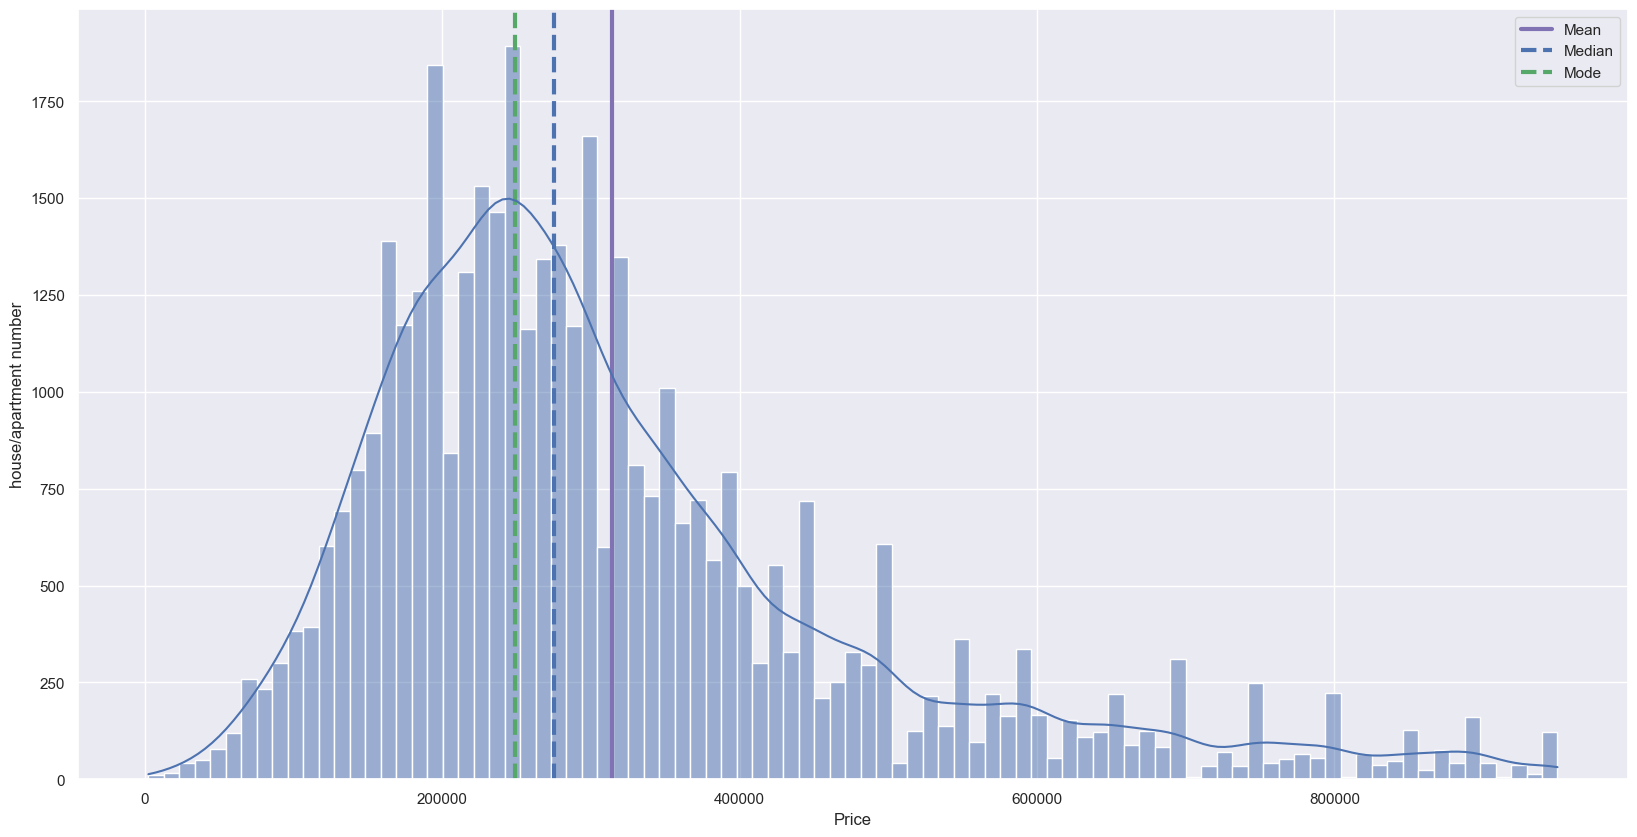

In [70]:
# Resize the graph size
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')

# Math and display the Mode, Median and Mean
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode()[0]

plt.axvline(mean, color='m', linewidth=3,label='Mean')
plt.axvline(median, color='b', linestyle='dashed', linewidth=3,label='Median')
plt.axvline(mode, color='g', linestyle='dashed', linewidth=3,label='Mode')

# Label the axis
plt.xlabel('Price')
plt.ylabel('house/apartment number')
plt.legend()

# Show the graph
ax = sns.histplot(df['price'], kde=True)

mean=round(mean)
median=round(median)
mode=round(mode)

print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")
plt.savefig('price.svg', dpi=300)
plt.show()

In [71]:
skew = df['price'].skew()
kurtosis = df['price'].kurt()

print(f"Skew: {skew} - Kurtosis: {kurtosis}")

Skew: 1.370488372887947 - Kurtosis: 1.949629927156578


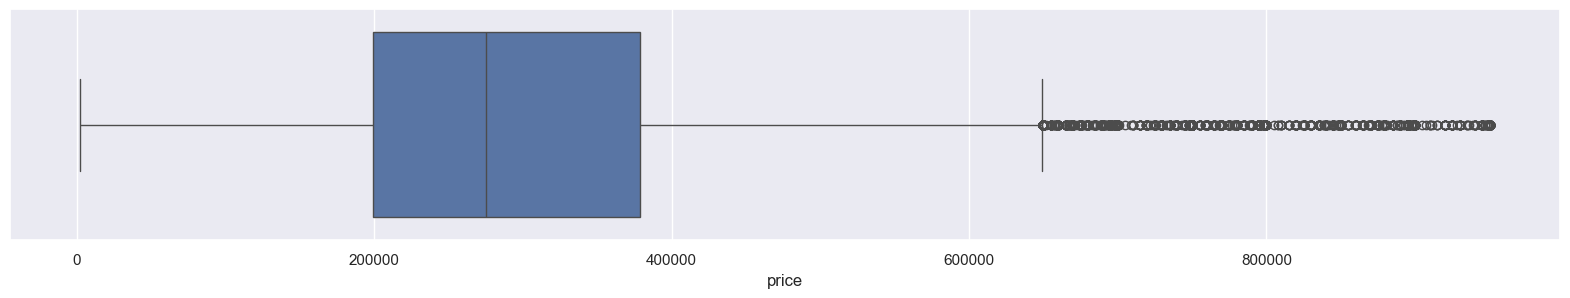

In [72]:
# Print the outliers horizontally
plt.figure(figsize=(20,3))
sns.boxplot(x=df["price"])
plt.show()

In [73]:
# Remove the outliers
index = df[(df['price'] >= 720000)].index
df.drop(index, inplace=True)

# Apply Boxcox operation to reduce the skrewness
corrected_price = stats.boxcox(df['price'])[0]
df['price_corrected'] = pd.Series(corrected_price)

skew = df['price_corrected'].skew()
kurtosis = df['price_corrected'].kurt()
print(f"Skew: {skew} - Kurtosis: {kurtosis}")

Skew: 0.017912698615022586 - Kurtosis: 0.188156121550485


Mean: 196 - Median: 195 - Mode: 176


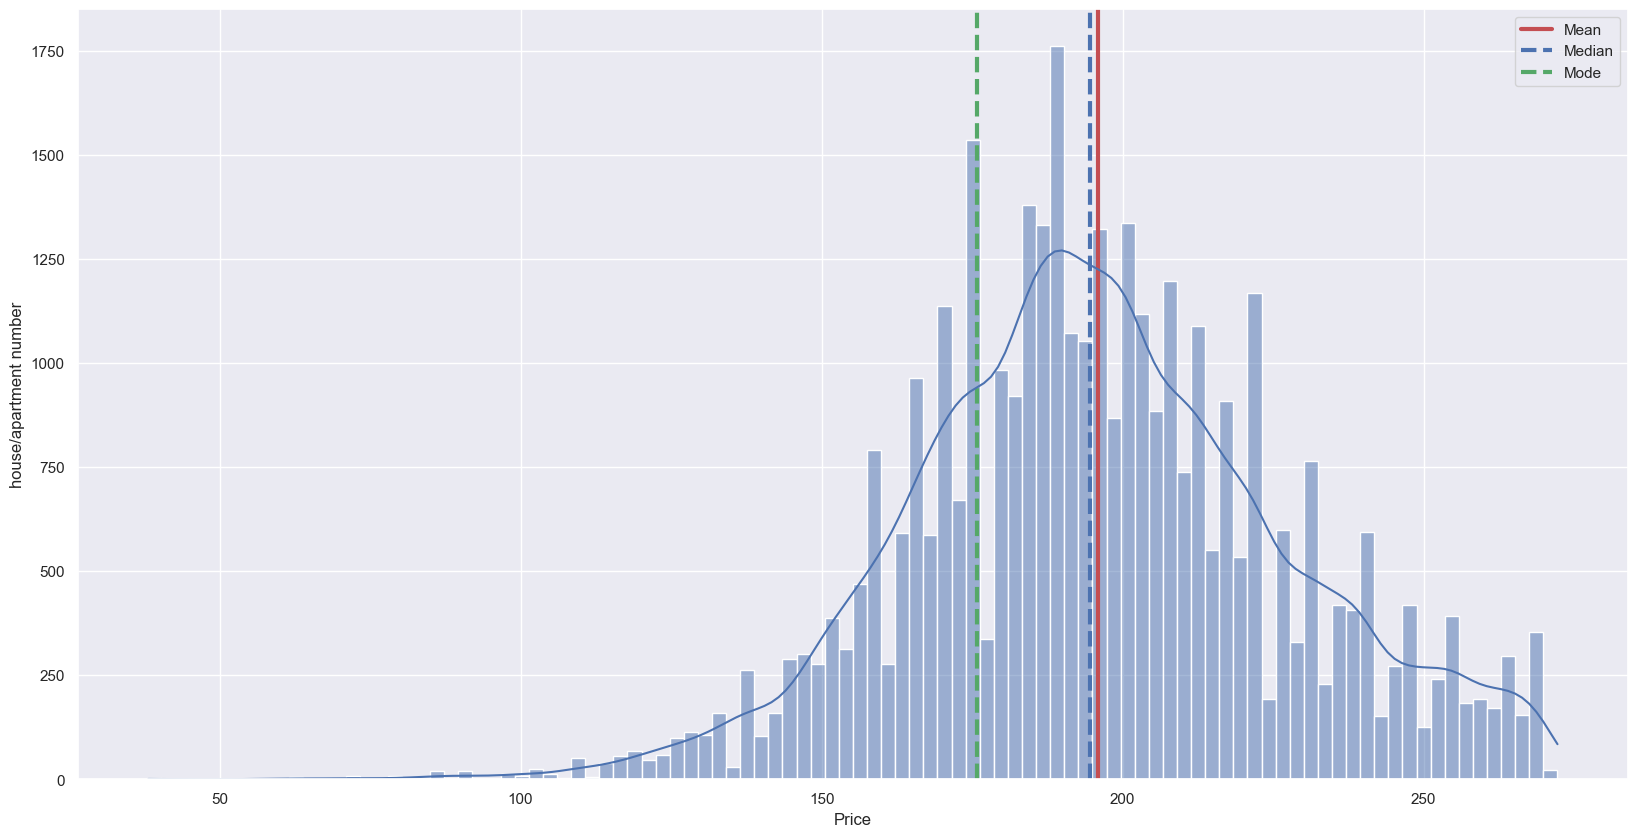

In [74]:
# Resize the graph size

plt.figure(figsize=(20,10))


# Math and display the Mode, Median and Mean

mean = df['price_corrected'].mean()
median = df['price_corrected'].median()
mode = df['price_corrected'].mode()[0]


plt.axvline(mean, color='r', linewidth=3,label='Mean')
plt.axvline(median, color='b', linestyle='dashed', linewidth=3,label='Median')
plt.axvline(mode, color='g', linestyle='dashed', linewidth=3,label='Mode')

plt.xlabel('Price')
plt.ylabel('house/apartment number')
plt.legend()


ax = sns.histplot(df['price_corrected'], kde=True)

print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")
plt.savefig('price_corrected.svg', dpi=300)
plt.show()

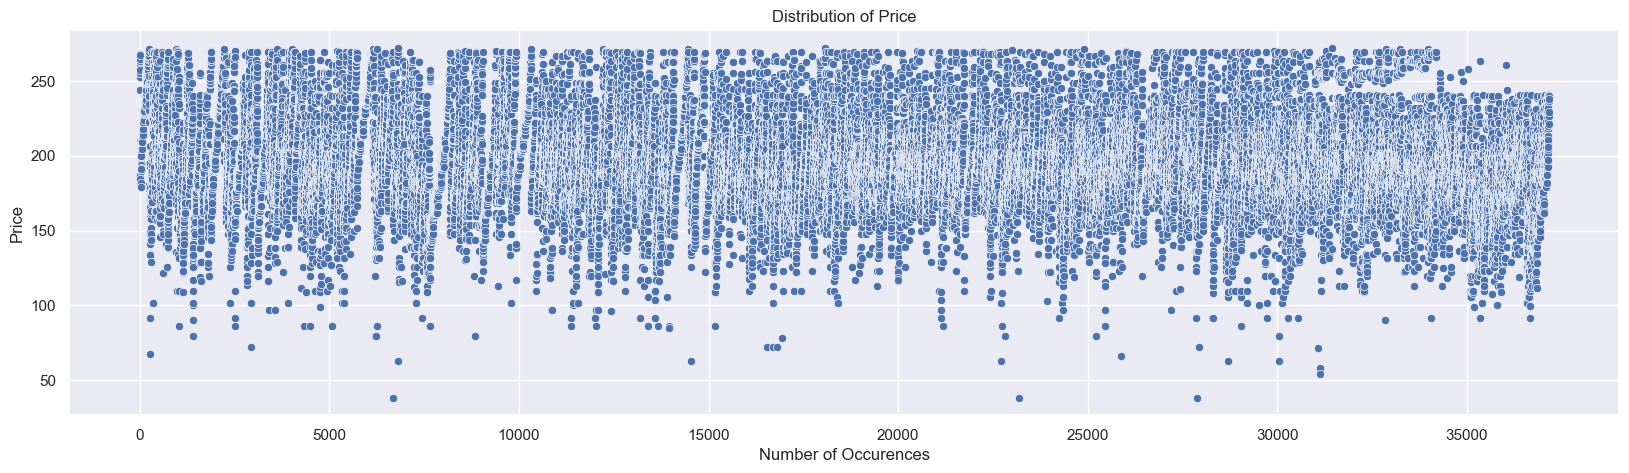

In [75]:
# Check the price distribution

plt.figure(figsize=(20,5))

plt.title("Distribution of Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Price");

ax = sns.scatterplot(x=range(df.shape[0]), y=df["price_corrected"].values)
plt.show()

In [76]:
df['price_m2'] = df['price'] / df['house_area']

df = movecol(df, cols_to_move=['price_m2'], ref_col='price',place='After')

<Axes: >

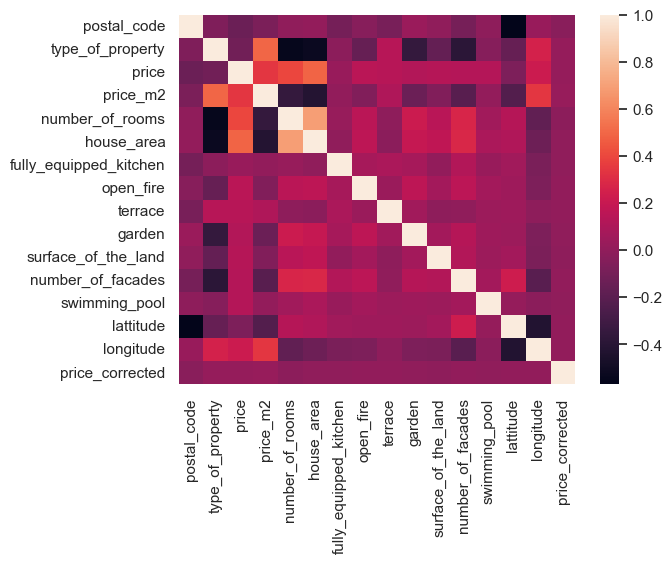

In [77]:
sns.heatmap(df.select_dtypes(include='number').corr())


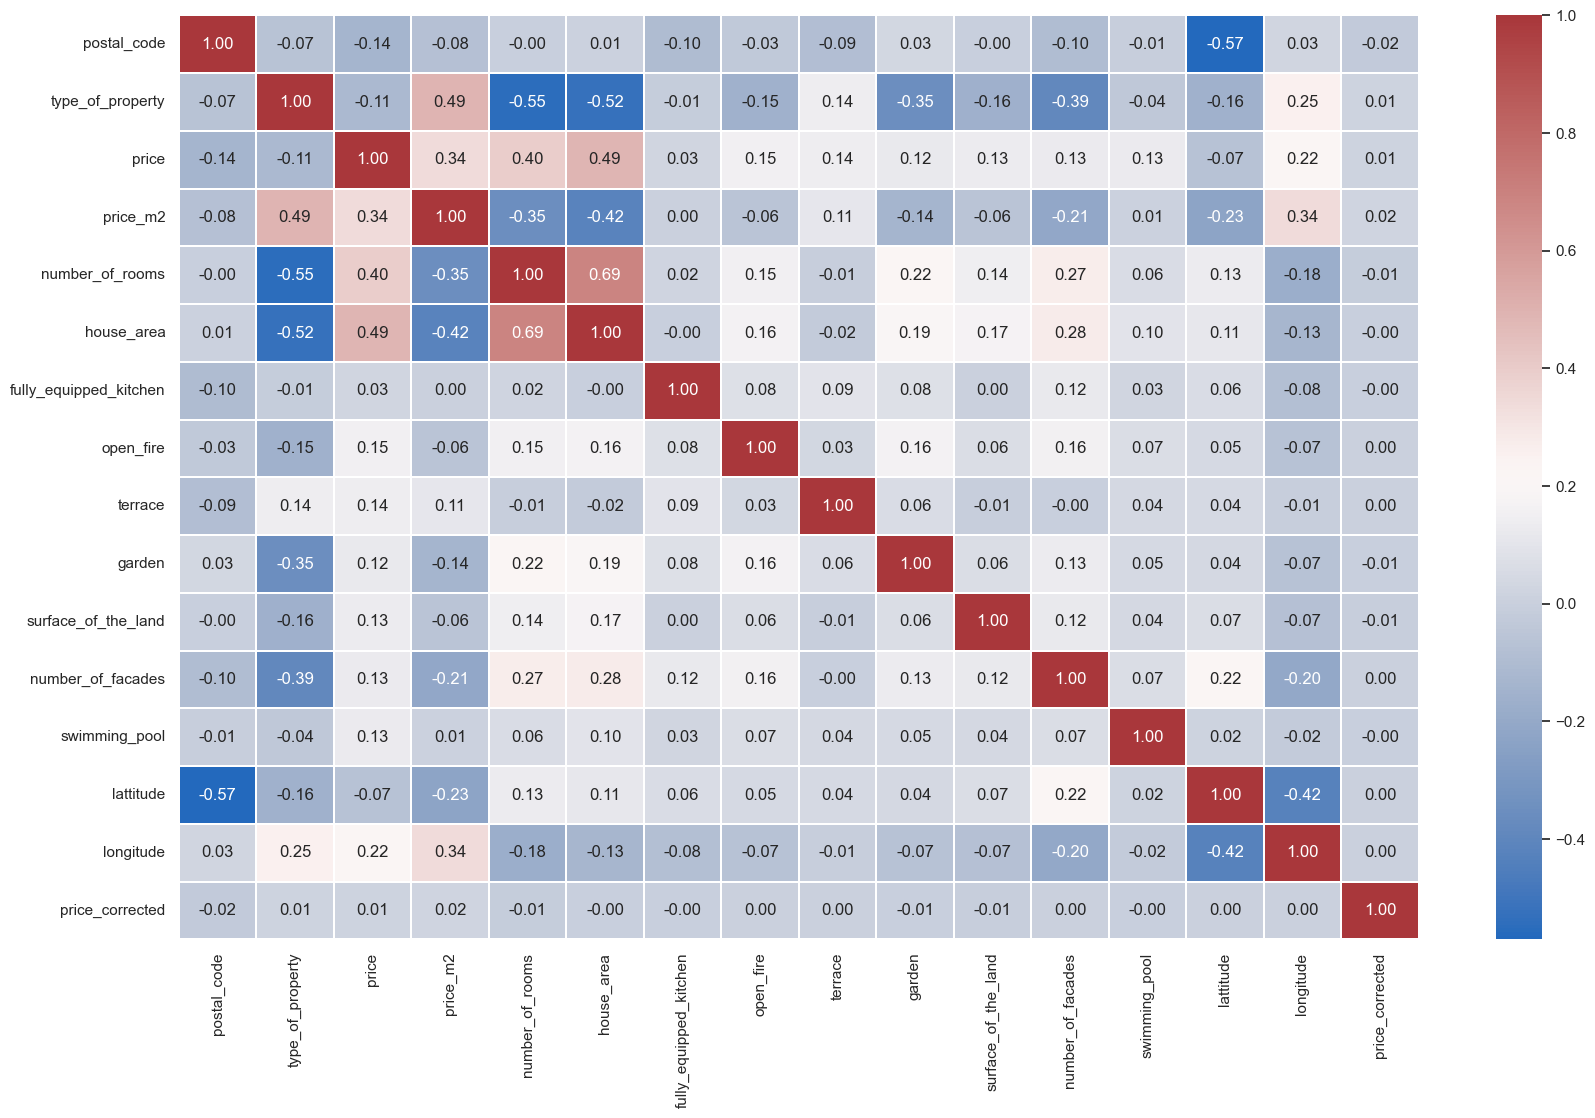

In [78]:
fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(df.select_dtypes(include='number').corr(), 
            ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap="vlag")

plt.show()


In [79]:
# Look at the correlation
df['price'].corr(df['house_area'], method='spearman')

# https://fr.wikipedia.org/wiki/Corr%C3%A9lation_de_Spearman

np.float64(0.5173924625128127)

C:\Users\zahid\AppData\Local\Temp\ipykernel_10124\1272109012.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_vals, y=y_vals, ci=None, ax=plot.ax_joint)


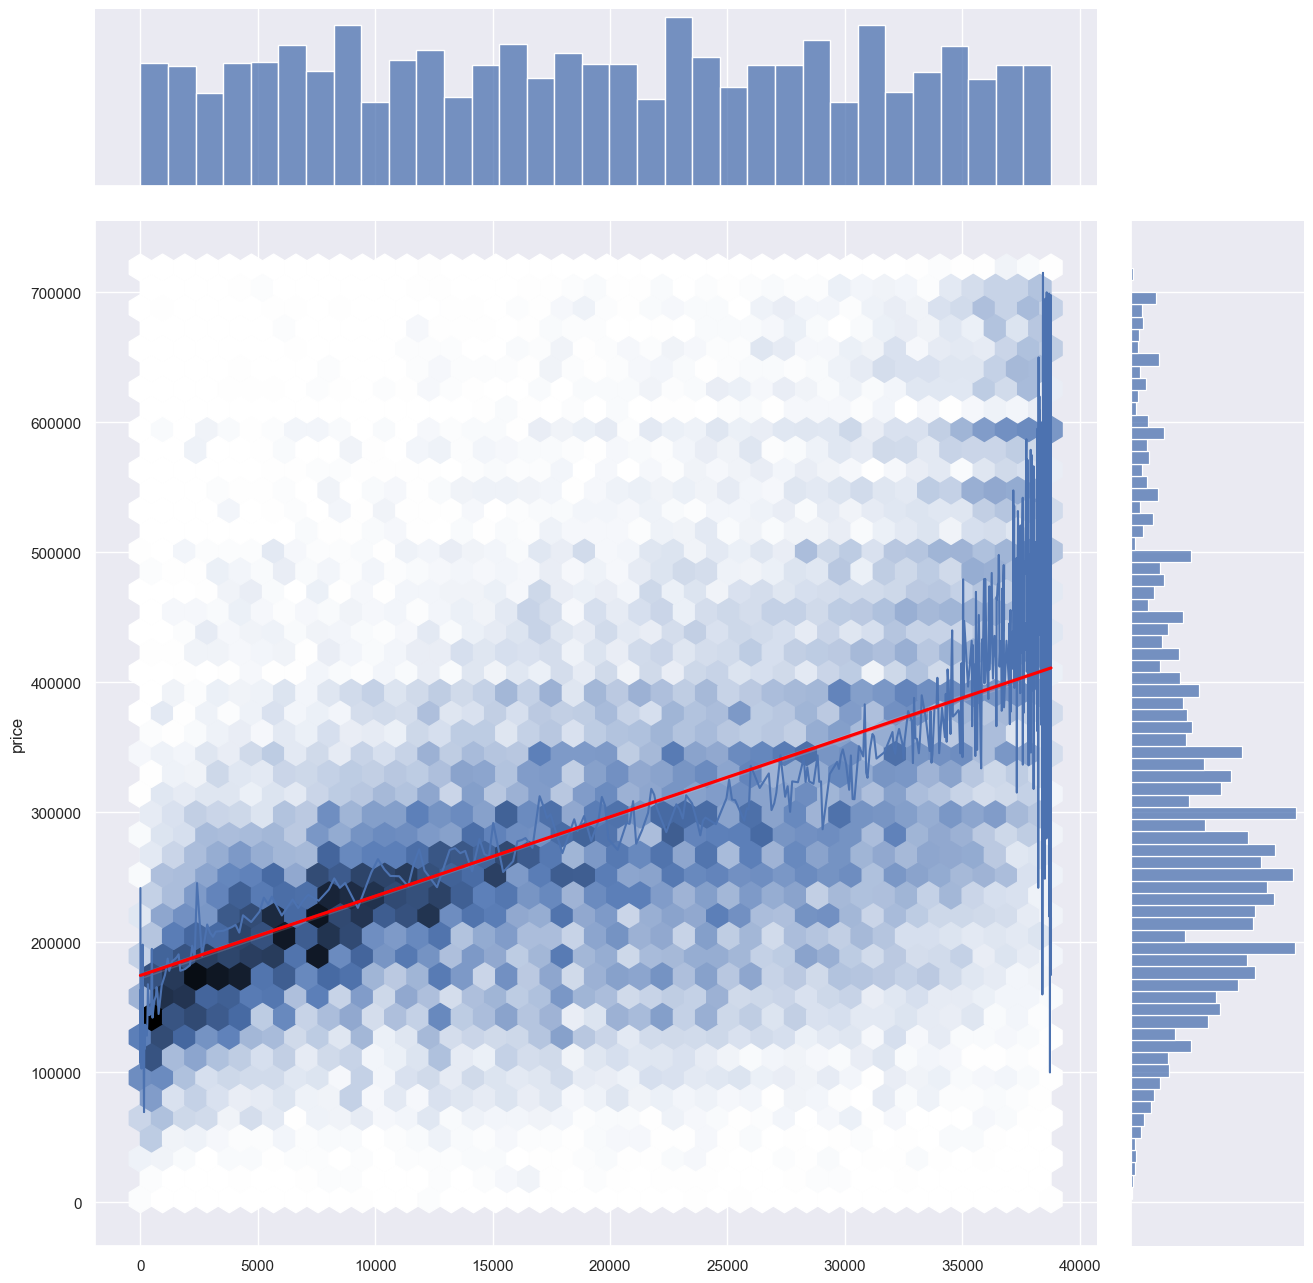

In [80]:
# Displaying the relation

x_vals = stats.rankdata(df['house_area'])
y_vals = df['price']

plot = sns.jointplot(x=x_vals, y=y_vals, height=13, kind="hex")

sns.lineplot(x=x_vals, y=y_vals, ci=None, ax=plot.ax_joint)
sns.regplot(x=x_vals, y=y_vals, scatter=False, robust=False, color='red', ax=plot.ax_joint)

plot.figure.savefig('price_housearea.svg', dpi=300)
plt.show()


In [81]:
# Look at the correlation

df['price'].corr(df['number_of_rooms'])

np.float64(0.3956224241377006)

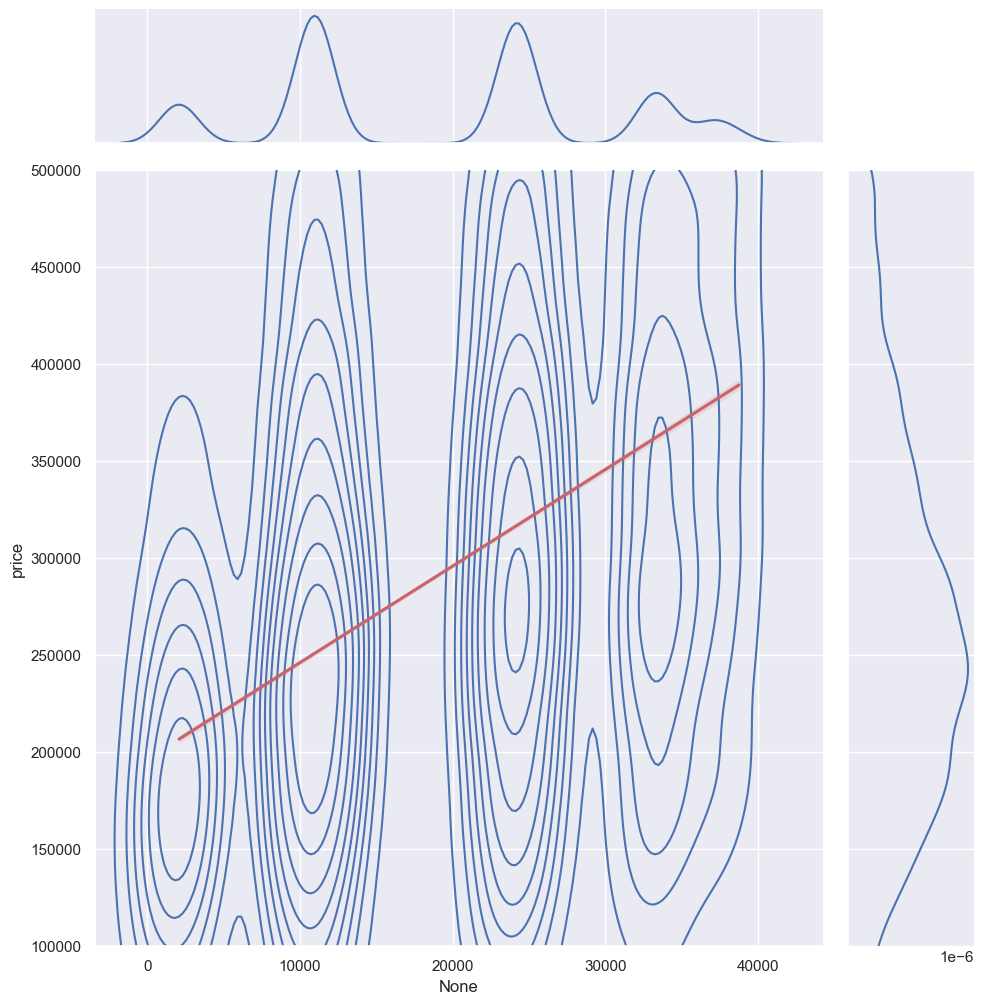

In [82]:
# Putting a regression line. 

plot = sns.jointplot(x=stats.rankdata(df['number_of_rooms']), y=df['price'], ylim=(100000, 500000), height=10, kind="kde")
sns.regplot(x=stats.rankdata(df['number_of_rooms']),y=df['price'], scatter=False, robust=False, color='#c9646a', ax=plot.ax_joint)

plt.show()

In [83]:
# Look at the correlation
df['price'].corr(df['longitude'])

np.float64(0.21766932117355806)

In [84]:
# Create a markers dataset
markers = df.groupby(['lattitude', 'longitude'])[['price_m2']].mean()
markers.reset_index(inplace=True)

# Append colors
# background-image: linear-gradient(to right top, #6db300, #aa9800, #d47400, #ec4731, #eb1267);
median = round(markers['price_m2'].median())
percent_25 = median // 2
percent_75 = median + percent_25
percent_95 = (median * 2) * 0.95

def add_color(x):
  if x < percent_25:
    return '#6db300'
  elif x < median:
    return '#aa9800'
  elif x < percent_75:
    return '#d47400'
  elif x < percent_95:
    return '#ec4731'
  else:
    return '#000000'

colors = markers['price_m2'].apply(lambda price: pd.Series({
    'color': add_color(price)
    }))
markers = pd.concat([markers, colors], axis=1)


In [85]:
m = folium.Map(
    location=[50.5010789, 4.4764595],
    tiles='cartodbpositron',
    zoom_start=8
    )

markers.apply(lambda loc: folium.CircleMarker(location=[loc["longitude"], loc["lattitude"]], radius=4, color=loc['color'], fill=True, fill_color=loc['color']).add_to(m), axis=1)
m

m.save("map_pricem2.html")

In [86]:
# Remove the outliers (Westouter)
df = df[df['city_name'] != "Westouter"]

# Math the top 5 max average price/m2
mean_pricem2 = df.groupby(['city_name', 'region'])[['price_m2']].mean()
mean_pricem2.sort_values('price_m2', ascending=False).head()

,,price_m2
city_name,region,
Knokke,Flandre,5435.201496
Leuven,Flandre,4706.015643
Ramskapelle,Flandre,4361.488368
Heverlee,Flandre,4282.210161
Auderghem,Bruxelles,3940.477544


In [87]:
# Math the top 5 min average price/m2
mean_pricem2.sort_values('price_m2', ascending=True).head()

,,price_m2
city_name,region,
Beauwelz,Wallonie,350.000000
Focant,Wallonie,390.243902
Nollevaux,Wallonie,421.212121
Attre,Wallonie,560.424679
Roucourt,Wallonie,657.142857


In [88]:
# Math the top 5 max median price/m2
median_pricem2 = df.groupby(['city_name', 'region'])[['price_m2']].median()
median_pricem2.sort_values('price_m2', ascending=False).head()

,,price_m2
city_name,region,
Knokke,Flandre,5512.092316
Ramskapelle,Flandre,4241.071429
Leuven,Flandre,4090.909091
Auderghem,Bruxelles,3888.524590
Ixelles,Bruxelles,3840.000000


In [89]:
# Math the top 5 min median price/m2
median_pricem2.sort_values('price_m2', ascending=True).head()

,,price_m2
city_name,region,
Beauwelz,Wallonie,350.000000
Focant,Wallonie,390.243902
Nollevaux,Wallonie,421.212121
Attre,Wallonie,560.424679
Roucourt,Wallonie,657.142857


In [90]:
# Math the top 5 max average price/m2
mean_pricem2 = df[df['region'] == 'Wallonie'].groupby(['city_name', 'province'])[['price_m2']].mean()
mean_pricem2.sort_values('price_m2', ascending=False).head()

,,price_m2
city_name,province,
Louvain-La-Neuve,Brabant wallon,3750.368855
Thines,Brabant wallon,3437.500000
Ottignies,Brabant wallon,3160.334344
Genval,Brabant wallon,3094.002085
La Hulpe,Brabant wallon,3057.616008


In [91]:
# Math the top 5 min average price/m2
mean_pricem2.sort_values('price_m2', ascending=True).head()

,,price_m2
city_name,province,
Beauwelz,Hainaut,350.000000
Focant,Namur,390.243902
Nollevaux,Luxembourg,421.212121
Attre,Hainaut,560.424679
Roucourt,Hainaut,657.142857


In [92]:
# Math the top 5 max median price/m2
median_pricem2 = df[df['region'] == 'Wallonie'].groupby(['city_name', 'province'])[['price_m2']].median()
median_pricem2.sort_values('price_m2', ascending=False).head()

,,price_m2
city_name,province,
Louvain-La-Neuve,Brabant wallon,3833.503650
Thines,Brabant wallon,3437.500000
Ottignies,Brabant wallon,3402.777778
Genval,Brabant wallon,3172.222222
La Hulpe,Brabant wallon,2976.190476


In [93]:
# Math the top 5 min average price/m2
median_pricem2.sort_values('price_m2', ascending=True).head()

,,price_m2
city_name,province,
Beauwelz,Hainaut,350.000000
Focant,Namur,390.243902
Nollevaux,Luxembourg,421.212121
Attre,Hainaut,560.424679
Roucourt,Hainaut,657.142857


In [94]:
# Math the top 5 max average price/m2
mean_pricem2 = df[df['region'] == 'Flandre'].groupby(['city_name', 'province'])[['price_m2']].mean()
mean_pricem2.sort_values('price_m2', ascending=False).head()

,,price_m2
city_name,province,
Knokke,Flandre-Occidentale,5435.201496
Leuven,Brabant flamand,4706.015643
Ramskapelle,Flandre-Occidentale,4361.488368
Heverlee,Brabant flamand,4282.210161
Nieuwpoort,Flandre-Occidentale,3828.161647


In [95]:
# Math the top 5 min average price/m2
mean_pricem2.sort_values('price_m2', ascending=True).head()

,,price_m2
city_name,province,
Bossuit,Flandre-Occidentale,698.412698
Elverdinge,Flandre-Occidentale,733.673469
Wijtschate,Flandre-Occidentale,833.333333
Schorisse,Flandre-Orientale,836.592179
Herstappe,Limbourg,984.189723


In [96]:
# Math the top 5 max median price/m2
median_pricem2 = df[df['region'] == 'Flandre'].groupby(['city_name', 'province'])[['price_m2']].median()
median_pricem2.sort_values('price_m2', ascending=False).head()

,,price_m2
city_name,province,
Knokke,Flandre-Occidentale,5512.092316
Ramskapelle,Flandre-Occidentale,4241.071429
Leuven,Brabant flamand,4090.909091
Nieuwpoort,Flandre-Occidentale,3700.961538
Gent,Flandre-Orientale,3633.669772


In [97]:
# Math the top 5 min median price/m2
median_pricem2.sort_values('price_m2', ascending=False).head()

,,price_m2
city_name,province,
Knokke,Flandre-Occidentale,5512.092316
Ramskapelle,Flandre-Occidentale,4241.071429
Leuven,Brabant flamand,4090.909091
Nieuwpoort,Flandre-Occidentale,3700.961538
Gent,Flandre-Orientale,3633.669772


In [98]:
# Look at the correlation
df['house_area'].corr(df['number_of_rooms'])

np.float64(0.6908853815728596)

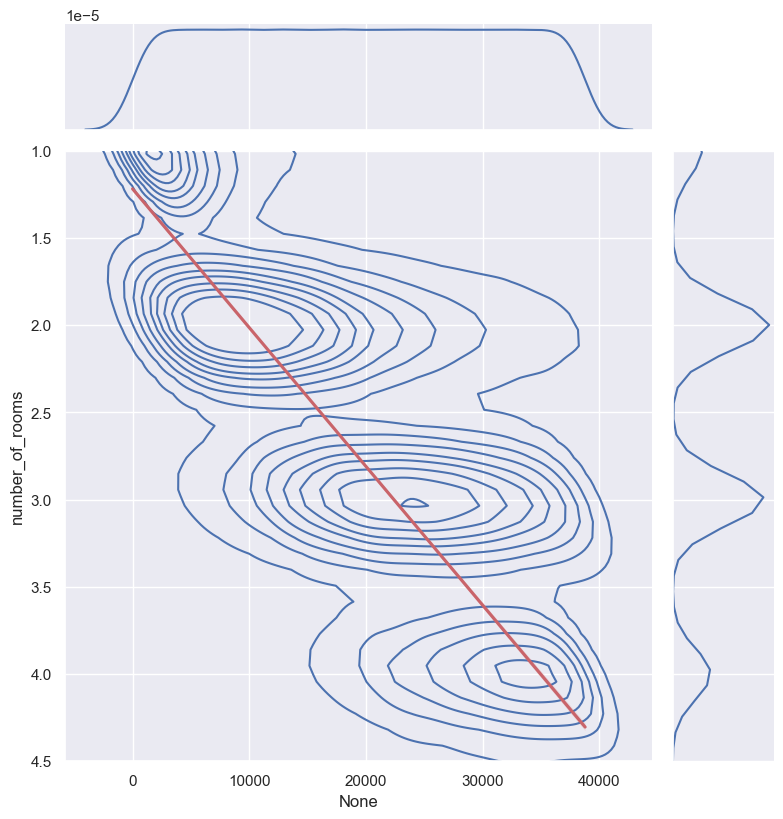

In [99]:
# Putting a regression line. 
plot = sns.jointplot(x=stats.rankdata(df['house_area']), y=df['number_of_rooms'], ylim=4.5, height=8, kind="kde")
sns.regplot(x=stats.rankdata(df['house_area']),y=df['number_of_rooms'], scatter=False, robust=False, color='#c9646a', ax=plot.ax_joint)
plt.show()

In [100]:
# Look at the correlation
df['type_of_property'].corr(df['longitude'])

np.float64(0.25265683748411694)

In [101]:
# Create a markers dataset
# https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
markers = df.groupby(['lattitude', 'longitude'])['type_of_property'].apply(pd.Series.mode).to_frame()
markers.reset_index(inplace=True)

# Append colors
# background-image: linear-gradient(to right top, #6db300, #aa9800, #d47400, #ec4731, #eb1267);

def add_color(x):
  if x == 0:
    return '#051937'
  else:
    return '#845EC2'

colors = markers['type_of_property'].apply(lambda facades: pd.Series({
    'color': add_color(facades)
    }))
markers = pd.concat([markers, colors], axis=1)

# Drop 0 and 'level_2'
markers.drop(columns='level_2', inplace=True)

In [102]:
# Create the map
m = folium.Map(
    location=[50.5010789, 4.4764595],
    tiles='cartodbpositron',
    zoom_start=8
    )

markers.apply(lambda loc: folium.CircleMarker(location=[loc["longitude"], loc["lattitude"]], radius=4, color=loc['color'], fill=True, fill_color=loc['color']).add_to(m), axis=1)
m

m.save("map_propertytype.html")

In [103]:
# Correlation's lookup
df['type_of_property'].corr(df['number_of_rooms'])

np.float64(-0.5496258623635195)

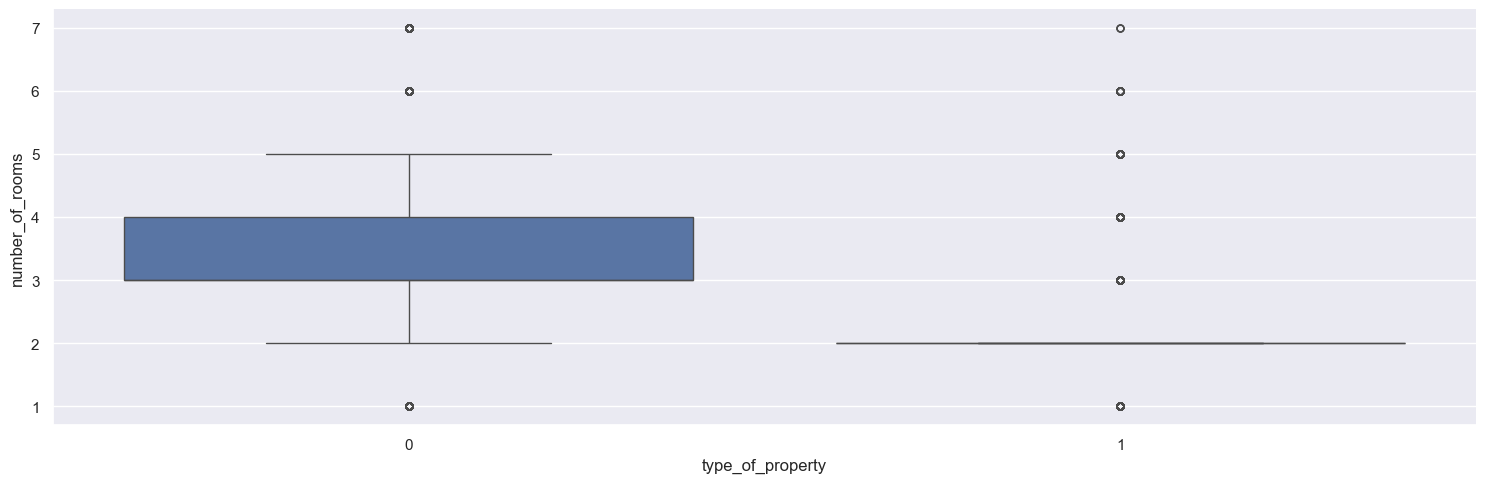

In [104]:
# Remove outliers
rooms_type = df[(df['number_of_rooms'] <= 7)]

# Display the correlation
plot = sns.catplot(x="type_of_property", y="number_of_rooms", kind="box", height=5, aspect=3, data=rooms_type)

plt.savefig('propertytype_roomsnumber.svg', dpi=300)
plt.show()


In [105]:
# Look at the correlation
df['type_of_property'].corr(df['house_area'])

np.float64(-0.5228113688571676)

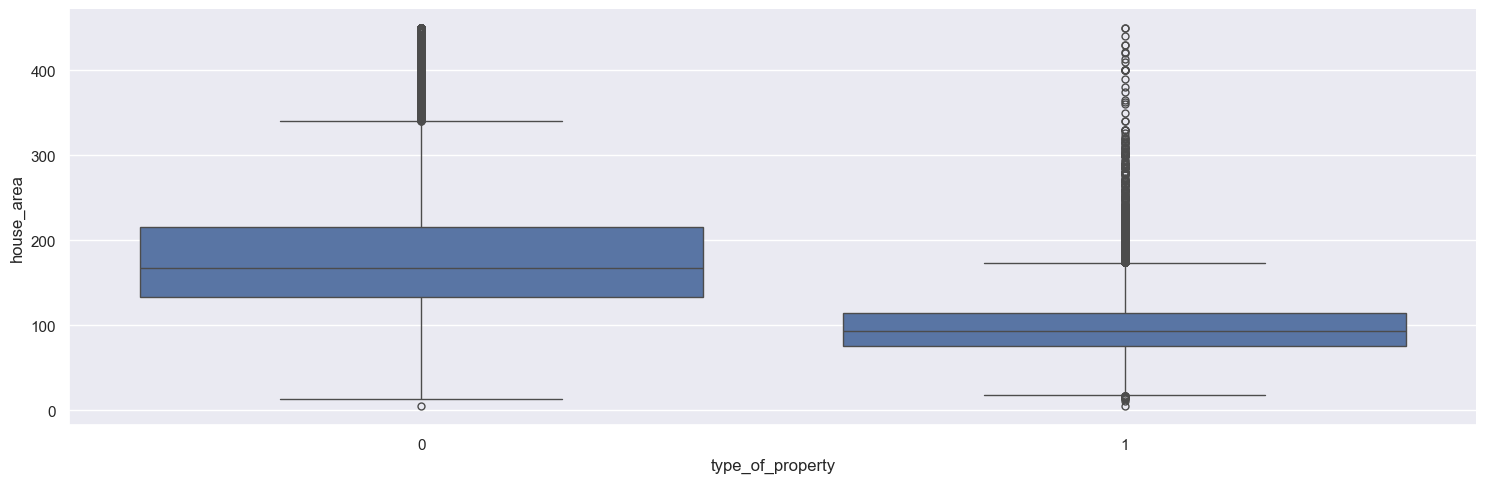

<Figure size 640x480 with 0 Axes>

In [106]:
# Remove outliers
area_type = df[(df['house_area'] <= 450)]

# Display the correlation
plot = sns.catplot(x="type_of_property", y="house_area", kind="box", height=5, aspect=3, data=area_type)
plt.show()

area_type.groupby('type_of_property')['house_area'].median()

plt.savefig('housearea_typeproperty.svg', dpi=300)

In [107]:
# Correlation's lookup
df['type_of_property'].corr(df['garden'])

np.float64(-0.3503349219246067)

C:\Users\zahid\AppData\Local\Temp\ipykernel_10124\3561902648.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.catplot(x="type_of_property", y="garden", data=df, kind="bar", ci=None, height=5, aspect=3)


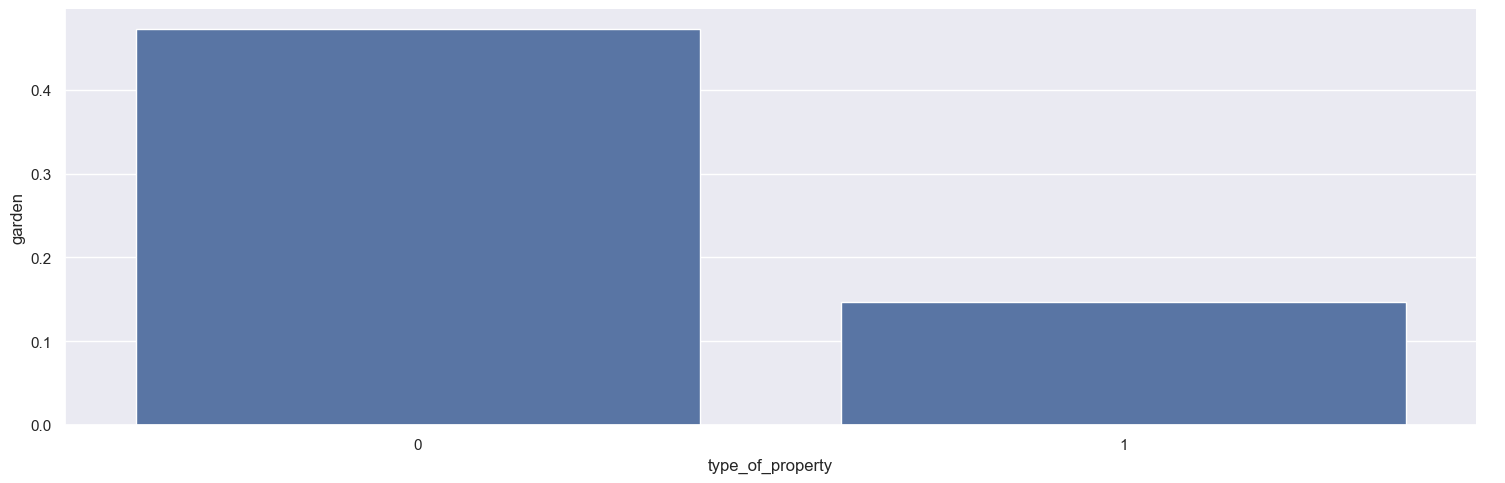

In [108]:
plot = sns.catplot(x="type_of_property", y="garden", data=df, kind="bar", ci=None, height=5, aspect=3)

plt.savefig('garden_typeproperty.svg', dpi=300)

In [109]:
# Look at the correlation
df['price_m2'].corr(df['type_of_property'], method='spearman')

np.float64(0.6032725168504877)

In [110]:
# Remove the outliers
df = df[(df['price_m2'] <= 14000)]

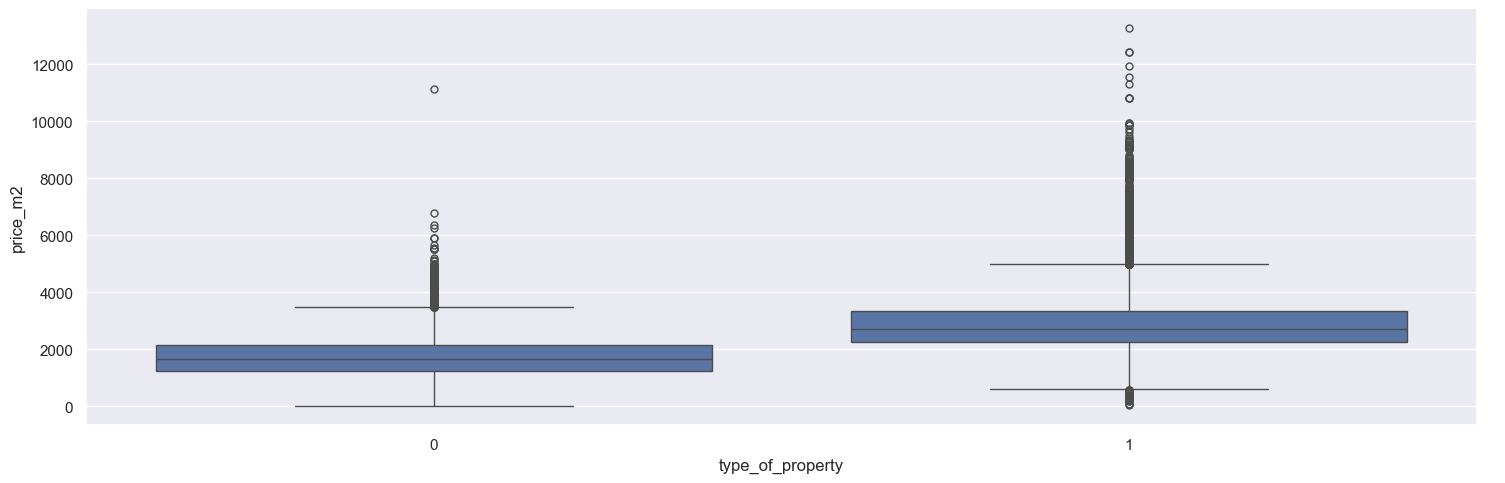

<Figure size 640x480 with 0 Axes>

In [111]:
# Displaying the correlation
# 0 = House
# 1 = Appartement

plot = sns.catplot(x="type_of_property", y="price_m2", kind="box", height=5, aspect=3, data=df)
plt.show()

df.groupby('type_of_property')['price_m2'].median()

plt.savefig('pricem2_propertytype.svg', dpi=300)

In [112]:
df['city_name'].value_counts()

city_name
Antwerpen         828
Oostende          678
Gent              594
Knokke            542
Uitkerke          446
                 ... 
Florée              1
Bruyelle            1
Wijtschate          1
Forge-Philippe      1
Borchtlombeek       1
Name: count, Length: 1041, dtype: int64